In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

print(xgb.__version__)

3.0.0


In [1]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label
cancer_dr.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [2]:
print(dataset.target_names)

['malignant' 'benign']


In [3]:
print(f"target의 분포 :\n{cancer_dr['target'].value_counts()}")

target의 분포 :
target
1    357
0    212
Name: count, dtype: int64


In [9]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

# cancer_df에서 feature용 DataFrame과 label용 Series 객체 추출 : 위 데이터프레임을 데이터와 레이블(target) 분리
# 맨 마지막 컬럼이 Label임
# Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1로 슬라이싱으로 추출
X_features=cancer_dr.iloc[:,:-1] # 데이터 추출
y_label=cancer_dr.iloc[:,-1] # 레이블 추출

# 전체 데이터 중 80% 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_label
    ,train_size=0.8
    ,random_state=156
)
# xgboost : 검증을 한다 => 조기 종료
# 검증하려면 데이터 필요
# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검즘용 데이터로 분리
X_tr,X_val,y_tr,y_val=train_test_split(
    X_train
    ,y_train
    ,test_size=0.1
    ,random_state=156
)
print(f'X train shape : {X_train.shape}')
print(f'X test shape : {X_test.shape}')

print(f'X tr shape : { X_tr.shape}')
print(f'X val shape : { X_val.shape}')



X train shape : (455, 30)
X test shape : (114, 30)
X tr shape : (409, 30)
X val shape : (46, 30)


In [16]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

# cancer_df에서 feature용 DataFrame과 label용 Series 객체 추출 : 위 데이터프레임을 데이터와 레이블(target) 분리
# 맨 마지막 컬럼이 Label임
# Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1로 슬라이싱으로 추출
X_features=cancer_dr.iloc[:,:-1] # 데이터 추출
y_label=cancer_dr.iloc[:,-1] # 레이블 추출

# 전체 데이터 중 80% 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_label
    ,train_size=0.8
    ,random_state=156
)
# xgboost : 검증을 한다 => 조기 종료
# 검증하려면 데이터 필요
# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검즘용 데이터로 분리
X_tr,X_val,y_tr,y_val=train_test_split(
    X_train
    ,y_train
    ,test_size=0.1
    ,random_state=156
)

# 파이썬 기반 XGBoost 사용 : array 바로 사용 안됨 : 전용 데이터 타입을 사용
# array를 전용 데이터 타입으로 변환 함수 : Dmatrix()
# 학습, 검증, 테스트용 DMatrix를 생성
# 1. 학습데이터 변환
dtr=xgb.DMatrix(data=X_tr,label=y_tr)
# 2. 검증데이터 변환
dval=xgb.DMatrix(data=X_val,label=y_val)
# 3. 테스트데이터 변환
dtest=xgb.DMatrix(data=X_test,label=y_test)

params = {
    'max_depth': 3,  # 트리의 최대 깊이 (값이 클수록 모델이 복잡해지며 과적합 위험 증가)
    'eta': 0.05,  # 학습률 (값이 작을수록 학습 속도가 느려지지만 일반화 성능이 향상될 가능성이 있음)
    'objective': 'binary:logistic',  # 이진 분류 문제를 위한 로지스틱 회귀 설정
    'eval_metric': 'logloss'  # 평가 지표로 로그 손실(log loss) 사용 (값이 작을수록 성능이 좋음)
}

num_rounds = 400  # 부스팅 반복 횟수 (트리를 몇 개 생성할 것인지 결정)

# 학습 데이터 셋(dtr)은 'train', 평가 데이터 셋(dval)은 'eval'로 명기하여 학습 진행 상황을 모니터링
eval_list = [(dtr, 'train'), (dval, 'eval')]

# XGBoost 모델 학습
xgb_model = xgb.train(
    params=params,  # XGBoost 하이퍼파라미터 설정
    dtrain=dtr,  # 학습 데이터 셋
    num_boost_round=num_rounds,  # 부스팅 반복 횟수
    early_stopping_rounds=50,  # 50회 연속 개선이 없으면 학습 조기 종료 (과적합 방지)
    evals=eval_list  # 학습 과정에서 평가할 데이터 셋 목록 (학습 데이터와 검증 데이터)
)


[0]	train-logloss:0.62473	eval-logloss:0.63088
[1]	train-logloss:0.58662	eval-logloss:0.60461
[2]	train-logloss:0.55210	eval-logloss:0.58205
[3]	train-logloss:0.52068	eval-logloss:0.56165
[4]	train-logloss:0.49173	eval-logloss:0.54101
[5]	train-logloss:0.46517	eval-logloss:0.52206
[6]	train-logloss:0.44009	eval-logloss:0.50271
[7]	train-logloss:0.41646	eval-logloss:0.48606
[8]	train-logloss:0.39505	eval-logloss:0.46961
[9]	train-logloss:0.37523	eval-logloss:0.45485
[10]	train-logloss:0.35682	eval-logloss:0.44120
[11]	train-logloss:0.33964	eval-logloss:0.43123
[12]	train-logloss:0.32279	eval-logloss:0.41962
[13]	train-logloss:0.30783	eval-logloss:0.40848
[14]	train-logloss:0.29308	eval-logloss:0.39857
[15]	train-logloss:0.27928	eval-logloss:0.38945
[16]	train-logloss:0.26681	eval-logloss:0.38171
[17]	train-logloss:0.25498	eval-logloss:0.37381
[18]	train-logloss:0.24352	eval-logloss:0.36656
[19]	train-logloss:0.23307	eval-logloss:0.36014
[20]	train-logloss:0.22290	eval-logloss:0.35395
[2

In [18]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

# cancer_df에서 feature용 DataFrame과 label용 Series 객체 추출 : 위 데이터프레임을 데이터와 레이블(target) 분리
# 맨 마지막 컬럼이 Label임
# Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1로 슬라이싱으로 추출
X_features=cancer_dr.iloc[:,:-1] # 데이터 추출
y_label=cancer_dr.iloc[:,-1] # 레이블 추출

# 전체 데이터 중 80% 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_label
    ,train_size=0.8
    ,random_state=156
)
# xgboost : 검증을 한다 => 조기 종료
# 검증하려면 데이터 필요
# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검즘용 데이터로 분리
X_tr,X_val,y_tr,y_val=train_test_split(
    X_train
    ,y_train
    ,test_size=0.1
    ,random_state=156
)

# 파이썬 기반 XGBoost 사용 : array 바로 사용 안됨 : 전용 데이터 타입을 사용
# array를 전용 데이터 타입으로 변환 함수 : Dmatrix()
# 학습, 검증, 테스트용 DMatrix를 생성
# 1. 학습데이터 변환
dtr=xgb.DMatrix(data=X_tr,label=y_tr)
# 2. 검증데이터 변환
dval=xgb.DMatrix(data=X_val,label=y_val)
# 3. 테스트데이터 변환
dtest=xgb.DMatrix(data=X_test,label=y_test)

params = {
    'max_depth': 3,  # 트리의 최대 깊이 (값이 클수록 모델이 복잡해지며 과적합 위험 증가)
    'eta': 0.05,  # 학습률 (값이 작을수록 학습 속도가 느려지지만 일반화 성능이 향상될 가능성이 있음)
    'objective': 'binary:logistic',  # 이진 분류 문제를 위한 로지스틱 회귀 설정
    'eval_metric': 'logloss'  # 평가 지표로 로그 손실(log loss) 사용 (값이 작을수록 성능이 좋음)
}

num_rounds = 400  # 부스팅 반복 횟수 (트리를 몇 개 생성할 것인지 결정)

# 학습 데이터 셋(dtr)은 'train', 평가 데이터 셋(dval)은 'eval'로 명기하여 학습 진행 상황을 모니터링
eval_list = [(dtr, 'train'), (dval, 'eval')]

# XGBoost 모델 학습
xgb_model = xgb.train(
    params=params,  # XGBoost 하이퍼파라미터 설정
    dtrain=dtr,  # 학습 데이터 셋
    num_boost_round=num_rounds,  # 부스팅 반복 횟수
    early_stopping_rounds=50,  # 50회 연속 개선이 없으면 학습 조기 종료 (과적합 방지)
    evals=eval_list  # 학습 과정에서 평가할 데이터 셋 목록 (학습 데이터와 검증 데이터)
)

pred_probs=xgb_model.predict(dtest)

print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds=[1 if x >.5 else 0 for x in pred_probs]
print(f'예측값 표시 : {preds}')

[0]	train-logloss:0.62473	eval-logloss:0.63088
[1]	train-logloss:0.58662	eval-logloss:0.60461
[2]	train-logloss:0.55210	eval-logloss:0.58205
[3]	train-logloss:0.52068	eval-logloss:0.56165
[4]	train-logloss:0.49173	eval-logloss:0.54101
[5]	train-logloss:0.46517	eval-logloss:0.52206
[6]	train-logloss:0.44009	eval-logloss:0.50271


[7]	train-logloss:0.41646	eval-logloss:0.48606
[8]	train-logloss:0.39505	eval-logloss:0.46961
[9]	train-logloss:0.37523	eval-logloss:0.45485
[10]	train-logloss:0.35682	eval-logloss:0.44120
[11]	train-logloss:0.33964	eval-logloss:0.43123
[12]	train-logloss:0.32279	eval-logloss:0.41962
[13]	train-logloss:0.30783	eval-logloss:0.40848
[14]	train-logloss:0.29308	eval-logloss:0.39857
[15]	train-logloss:0.27928	eval-logloss:0.38945
[16]	train-logloss:0.26681	eval-logloss:0.38171
[17]	train-logloss:0.25498	eval-logloss:0.37381
[18]	train-logloss:0.24352	eval-logloss:0.36656
[19]	train-logloss:0.23307	eval-logloss:0.36014
[20]	train-logloss:0.22290	eval-logloss:0.35395
[21]	train-logloss:0.21335	eval-logloss:0.34726
[22]	train-logloss:0.20461	eval-logloss:0.34194
[23]	train-logloss:0.19610	eval-logloss:0.33611
[24]	train-logloss:0.18807	eval-logloss:0.33170
[25]	train-logloss:0.18054	eval-logloss:0.32730
[26]	train-logloss:0.17336	eval-logloss:0.32357
[27]	train-logloss:0.16659	eval-logloss:0.3

In [30]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

# cancer_df에서 feature용 DataFrame과 label용 Series 객체 추출 : 위 데이터프레임을 데이터와 레이블(target) 분리
# 맨 마지막 컬럼이 Label임
# Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1로 슬라이싱으로 추출
X_features=cancer_dr.iloc[:,:-1] # 데이터 추출
y_label=cancer_dr.iloc[:,-1] # 레이블 추출

# 전체 데이터 중 80% 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_label
    ,train_size=0.8
    ,random_state=156
)
# xgboost : 검증을 한다 => 조기 종료
# 검증하려면 데이터 필요
# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검즘용 데이터로 분리
X_tr,X_val,y_tr,y_val=train_test_split(
    X_train
    ,y_train
    ,test_size=0.1
    ,random_state=156
)

# 파이썬 기반 XGBoost 사용 : array 바로 사용 안됨 : 전용 데이터 타입을 사용
# array를 전용 데이터 타입으로 변환 함수 : Dmatrix()
# 학습, 검증, 테스트용 DMatrix를 생성
# 1. 학습데이터 변환
dtr=xgb.DMatrix(data=X_tr,label=y_tr)
# 2. 검증데이터 변환
dval=xgb.DMatrix(data=X_val,label=y_val)
# 3. 테스트데이터 변환
dtest=xgb.DMatrix(data=X_test,label=y_test)

# 파라미터 세팅
# 유방암 이진 분류
params = {
    'max_depth': 3,  # 트리의 최대 깊이 (값이 클수록 모델이 복잡해지며 과적합 위험 증가)
    'eta': 0.1,  # 학습률 (값이 작을수록 학습 속도가 느려지지만 일반화 성능이 향상될 가능성이 있음)
    'objective': 'binary:logistic',  # 이진 분류 문제를 위한 로지스틱 회귀 설정
    'eval_metric': 'logloss'  # 평가 지표로 로그 손실(log loss) 사용 (값이 작을수록 성능이 좋음)
}

num_rounds = 10000  # 부스팅 반복 횟수 (트리를 몇 개 생성할 것인지 결정)

# 학습 데이터와 검증 데이터 설정
# 학습 데이터 셋(dtr)은 'train', 평가 데이터 셋(dval)은 'eval'로 명기하여 학습 진행 상황을 모니터링
eval_list = [(dtr, 'train'), (dval, 'eval')]

# XGBoost 모델 학습
xgb_model = xgb.train(
    params=params,  # XGBoost 하이퍼파라미터 설정
    dtrain=dtr,  # 학습 데이터 셋
    num_boost_round=num_rounds,  # 부스팅 반복 횟수
    early_stopping_rounds=500,  # 50회 연속 개선이 없으면 학습 조기 종료 (과적합 방지)
    evals=eval_list  # 학습 과정에서 평가할 데이터 셋 목록 (학습 데이터와 검증 데이터)
)

pred_probs=xgb_model.predict(dtest)

print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))
# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds=[1 if x >0.5 else 0 for x in pred_probs]
print(f'예측값 10개만 표시 : {preds[:10]}')

[0]	train-logloss:0.58448	eval-logloss:0.60406
[1]	train-logloss:0.51755	eval-logloss:0.55810
[2]	train-logloss:0.46160	eval-logloss:0.51829
[3]	train-logloss:0.41227	eval-logloss:0.48332
[4]	train-logloss:0.37097	eval-logloss:0.45158
[5]	train-logloss:0.33550	eval-logloss:0.42452
[6]	train-logloss:0.30431	eval-logloss:0.40638
[7]	train-logloss:0.27728	eval-logloss:0.38845
[8]	train-logloss:0.25301	eval-logloss:0.37252
[9]	train-logloss:0.23069	eval-logloss:0.35833
[10]	train-logloss:0.21102	eval-logloss:0.34634
[11]	train-logloss:0.19422	eval-logloss:0.33539
[12]	train-logloss:0.17862	eval-logloss:0.32481
[13]	train-logloss:0.16474	eval-logloss:0.31769
[14]	train-logloss:0.15249	eval-logloss:0.31101
[15]	train-logloss:0.14137	eval-logloss:0.30528
[16]	train-logloss:0.13131	eval-logloss:0.30112
[17]	train-logloss:0.12213	eval-logloss:0.29578
[18]	train-logloss:0.11410	eval-logloss:0.29160
[19]	train-logloss:0.10684	eval-logloss:0.28791
[20]	train-logloss:0.10022	eval-logloss:0.28446
[2

In [33]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

# cancer_df에서 feature용 DataFrame과 label용 Series 객체 추출 : 위 데이터프레임을 데이터와 레이블(target) 분리
# 맨 마지막 컬럼이 Label임
# Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1로 슬라이싱으로 추출
X_features=cancer_dr.iloc[:,:-1] # 데이터 추출
y_label=cancer_dr.iloc[:,-1] # 레이블 추출

# 전체 데이터 중 80% 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_label
    ,train_size=0.8
    ,random_state=156
)
# xgboost : 검증을 한다 => 조기 종료
# 검증하려면 데이터 필요
# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검즘용 데이터로 분리
X_tr,X_val,y_tr,y_val=train_test_split(
    X_train
    ,y_train
    ,test_size=0.1
    ,random_state=156
)

# 파이썬 기반 XGBoost 사용 : array 바로 사용 안됨 : 전용 데이터 타입을 사용
# array를 전용 데이터 타입으로 변환 함수 : Dmatrix()
# 학습, 검증, 테스트용 DMatrix를 생성
# 1. 학습데이터 변환
dtr=xgb.DMatrix(data=X_tr,label=y_tr)
# 2. 검증데이터 변환
dval=xgb.DMatrix(data=X_val,label=y_val)
# 3. 테스트데이터 변환
dtest=xgb.DMatrix(data=X_test,label=y_test)

# 파라미터 세팅
# 유방암 이진 분류
params = {
    'max_depth': 3,  # 트리의 최대 깊이 (값이 클수록 모델이 복잡해지며 과적합 위험 증가)
    'eta': 0.1,  # 학습률 (값이 작을수록 학습 속도가 느려지지만 일반화 성능이 향상될 가능성이 있음)
    'objective': 'binary:logistic',  # 이진 분류 문제를 위한 로지스틱 회귀 설정
    'eval_metric': 'logloss'  # 평가 지표로 로그 손실(log loss) 사용 (값이 작을수록 성능이 좋음)
}

num_rounds = 10000  # 부스팅 반복 횟수 (트리를 몇 개 생성할 것인지 결정)

# 학습 데이터와 검증 데이터 설정
# 학습 데이터 셋(dtr)은 'train', 평가 데이터 셋(dval)은 'eval'로 명기하여 학습 진행 상황을 모니터링
eval_list = [(dtr, 'train'), (dval, 'eval')]

# XGBoost 모델 학습
xgb_model = xgb.train(
    params=params,  # XGBoost 하이퍼파라미터 설정
    dtrain=dtr,  # 학습 데이터 셋
    num_boost_round=num_rounds,  # 부스팅 반복 횟수
    early_stopping_rounds=500,  # 50회 연속 개선이 없으면 학습 조기 종료 (과적합 방지)
    evals=eval_list  # 학습 과정에서 평가할 데이터 셋 목록 (학습 데이터와 검증 데이터)
)

pred_probs=xgb_model.predict(dtest)

# print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
# print(np.round(pred_probs[:10],3))
# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds=[1 if x >0.5 else 0 for x in pred_probs]
print(f'예측값 10개만 표시 : {preds[:10]}')
print(y_test[:10],end='')

[0]	train-logloss:0.58448	eval-logloss:0.60406
[1]	train-logloss:0.51755	eval-logloss:0.55810
[2]	train-logloss:0.46160	eval-logloss:0.51829


[3]	train-logloss:0.41227	eval-logloss:0.48332
[4]	train-logloss:0.37097	eval-logloss:0.45158
[5]	train-logloss:0.33550	eval-logloss:0.42452
[6]	train-logloss:0.30431	eval-logloss:0.40638
[7]	train-logloss:0.27728	eval-logloss:0.38845
[8]	train-logloss:0.25301	eval-logloss:0.37252
[9]	train-logloss:0.23069	eval-logloss:0.35833
[10]	train-logloss:0.21102	eval-logloss:0.34634
[11]	train-logloss:0.19422	eval-logloss:0.33539
[12]	train-logloss:0.17862	eval-logloss:0.32481
[13]	train-logloss:0.16474	eval-logloss:0.31769
[14]	train-logloss:0.15249	eval-logloss:0.31101
[15]	train-logloss:0.14137	eval-logloss:0.30528
[16]	train-logloss:0.13131	eval-logloss:0.30112
[17]	train-logloss:0.12213	eval-logloss:0.29578
[18]	train-logloss:0.11410	eval-logloss:0.29160
[19]	train-logloss:0.10684	eval-logloss:0.28791
[20]	train-logloss:0.10022	eval-logloss:0.28446
[21]	train-logloss:0.09405	eval-logloss:0.28177
[22]	train-logloss:0.08850	eval-logloss:0.27983
[23]	train-logloss:0.08344	eval-logloss:0.27979

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

# cancer_df에서 feature용 DataFrame과 label용 Series 객체 추출 : 위 데이터프레임을 데이터와 레이블(target) 분리
# 맨 마지막 컬럼이 Label임
# Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1로 슬라이싱으로 추출
X_features=cancer_dr.iloc[:,:-1] # 데이터 추출
y_label=cancer_dr.iloc[:,-1] # 레이블 추출

# 전체 데이터 중 80% 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_label
    ,train_size=0.8
    ,random_state=156
)
# xgboost : 검증을 한다 => 조기 종료
# 검증하려면 데이터 필요
# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검즘용 데이터로 분리
X_tr,X_val,y_tr,y_val=train_test_split(
    X_train
    ,y_train
    ,test_size=0.1
    ,random_state=156
)

# 파이썬 기반 XGBoost 사용 : array 바로 사용 안됨 : 전용 데이터 타입을 사용
# array를 전용 데이터 타입으로 변환 함수 : Dmatrix()
# 학습, 검증, 테스트용 DMatrix를 생성
# 1. 학습데이터 변환
dtr=xgb.DMatrix(data=X_tr,label=y_tr)
# 2. 검증데이터 변환
dval=xgb.DMatrix(data=X_val,label=y_val)
# 3. 테스트데이터 변환
dtest=xgb.DMatrix(data=X_test,label=y_test)

# 파라미터 세팅
# 유방암 이진 분류
params = {
    'max_depth': 3,  # 트리의 최대 깊이 (값이 클수록 모델이 복잡해지며 과적합 위험 증가)
    'eta': 0.1,  # 학습률 (값이 작을수록 학습 속도가 느려지지만 일반화 성능이 향상될 가능성이 있음)
    'objective': 'binary:logistic',  # 이진 분류 문제를 위한 로지스틱 회귀 설정
    'eval_metric': 'logloss'  # 평가 지표로 로그 손실(log loss) 사용 (값이 작을수록 성능이 좋음)
}

num_rounds = 10000  # 부스팅 반복 횟수 (트리를 몇 개 생성할 것인지 결정)

# 학습 데이터와 검증 데이터 설정
# 학습 데이터 셋(dtr)은 'train', 평가 데이터 셋(dval)은 'eval'로 명기하여 학습 진행 상황을 모니터링
eval_list = [(dtr, 'train'), (dval, 'eval')]

# XGBoost 모델 학습
xgb_model = xgb.train(
    params=params,  # XGBoost 하이퍼파라미터 설정
    dtrain=dtr,  # 학습 데이터 셋
    num_boost_round=num_rounds,  # 부스팅 반복 횟수
    early_stopping_rounds=500,  # 50회 연속 개선이 없으면 학습 조기 종료 (과적합 방지)
    evals=eval_list  # 학습 과정에서 평가할 데이터 셋 목록 (학습 데이터와 검증 데이터)
)

pred_probs=xgb_model.predict(dtest)

# print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
# print(np.round(pred_probs[:10],3))
# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds=[1 if x >0.5 else 0 for x in pred_probs]
# print(f'예측값 10개만 표시 : {preds[:10]}')
# print(y_test[:10],end='')

# 유방암 여부 예측
# 오류에 민감한 모델 : 정확도만 보면 안된다
# 정밀도, 재현률, AUC
def get_clf_eval(y_test,pred=None,pred_probs=None):     # 원래답, 예측값(0,1), 예측 확률(0,1)
    from sklearn.metrics import confusion_matrix        # 혼돈행렬을 구하는 함수 (원래답, 예측값)
    from sklearn.metrics import accuracy_score          # 정확도 (원래답, 예측값)
    from sklearn.metrics import precision_score         # 정밀도 (원래답, 예측값)
    from sklearn.metrics import recall_score            # 재현률 (원래답, 예측값)
    from sklearn.metrics import f1_score                # 정밀도와 재현률의 조화 평균 (원래답, 예측값)
    from sklearn.metrics import roc_auc_score           # AUC 점수 : (원래답, 예측확률)
    confusion=confusion_matrix(
        y_test
        ,preds
    )
    acc=accuracy_score(
        y_test
        ,preds
    )
    precision=precision_score(
        y_test
        ,preds
    )
    recall_score_=recall_score(
        y_test
        ,preds
    )
    f1=f1_score(
        y_test
        ,preds
    )
    auc=roc_auc_score(
        y_test
        ,pred_probs
    )
    print(f'오차행렬\n{confusion}')
    
    # 평가지표 출력
    print(f'정확도 : {acc:.4f}, 정밀도 : {precision:.4f}, 재현률 : {recall_score_:.4f}, F1 : {f1:.4f}, AUC : {auc:.4f}')

get_clf_eval(y_test,preds,pred_probs)



[0]	train-logloss:0.58448	eval-logloss:0.60406
[1]	train-logloss:0.51755	eval-logloss:0.55810
[2]	train-logloss:0.46160	eval-logloss:0.51829
[3]	train-logloss:0.41227	eval-logloss:0.48332
[4]	train-logloss:0.37097	eval-logloss:0.45158


[5]	train-logloss:0.33550	eval-logloss:0.42452
[6]	train-logloss:0.30431	eval-logloss:0.40638
[7]	train-logloss:0.27728	eval-logloss:0.38845
[8]	train-logloss:0.25301	eval-logloss:0.37252
[9]	train-logloss:0.23069	eval-logloss:0.35833
[10]	train-logloss:0.21102	eval-logloss:0.34634
[11]	train-logloss:0.19422	eval-logloss:0.33539
[12]	train-logloss:0.17862	eval-logloss:0.32481
[13]	train-logloss:0.16474	eval-logloss:0.31769
[14]	train-logloss:0.15249	eval-logloss:0.31101
[15]	train-logloss:0.14137	eval-logloss:0.30528
[16]	train-logloss:0.13131	eval-logloss:0.30112
[17]	train-logloss:0.12213	eval-logloss:0.29578
[18]	train-logloss:0.11410	eval-logloss:0.29160
[19]	train-logloss:0.10684	eval-logloss:0.28791
[20]	train-logloss:0.10022	eval-logloss:0.28446
[21]	train-logloss:0.09405	eval-logloss:0.28177
[22]	train-logloss:0.08850	eval-logloss:0.27983
[23]	train-logloss:0.08344	eval-logloss:0.27979
[24]	train-logloss:0.07902	eval-logloss:0.27803
[25]	train-logloss:0.07489	eval-logloss:0.275

[0]	train-logloss:0.58448	eval-logloss:0.60406
[1]	train-logloss:0.51755	eval-logloss:0.55810
[2]	train-logloss:0.46160	eval-logloss:0.51829
[3]	train-logloss:0.41227	eval-logloss:0.48332
[4]	train-logloss:0.37097	eval-logloss:0.45158
[5]	train-logloss:0.33550	eval-logloss:0.42452
[6]	train-logloss:0.30431	eval-logloss:0.40638
[7]	train-logloss:0.27728	eval-logloss:0.38845
[8]	train-logloss:0.25301	eval-logloss:0.37252
[9]	train-logloss:0.23069	eval-logloss:0.35833
[10]	train-logloss:0.21102	eval-logloss:0.34634
[11]	train-logloss:0.19422	eval-logloss:0.33539
[12]	train-logloss:0.17862	eval-logloss:0.32481
[13]	train-logloss:0.16474	eval-logloss:0.31769
[14]	train-logloss:0.15249	eval-logloss:0.31101
[15]	train-logloss:0.14137	eval-logloss:0.30528
[16]	train-logloss:0.13131	eval-logloss:0.30112
[17]	train-logloss:0.12213	eval-logloss:0.29578
[18]	train-logloss:0.11410	eval-logloss:0.29160
[19]	train-logloss:0.10684	eval-logloss:0.28791
[20]	train-logloss:0.10022	eval-logloss:0.28446
[2

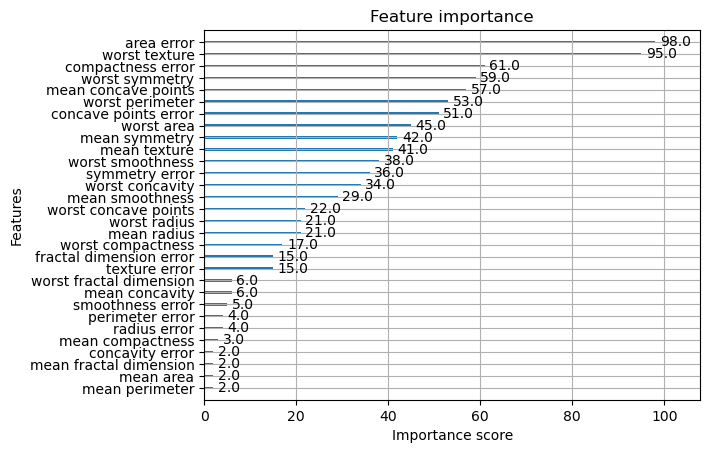

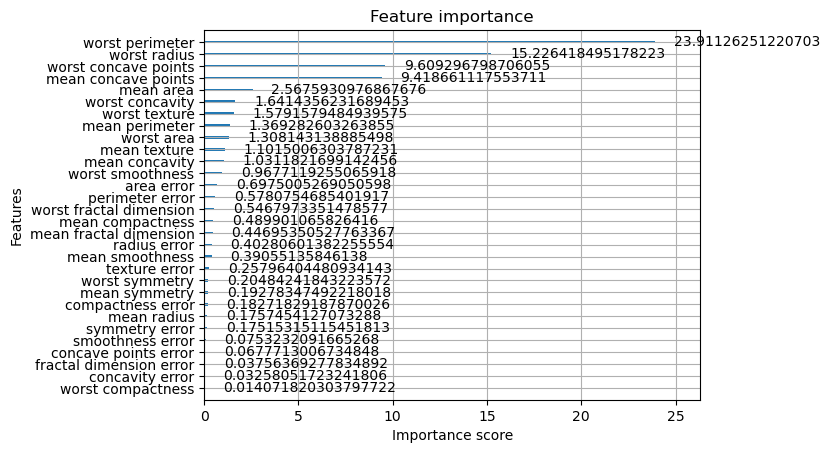

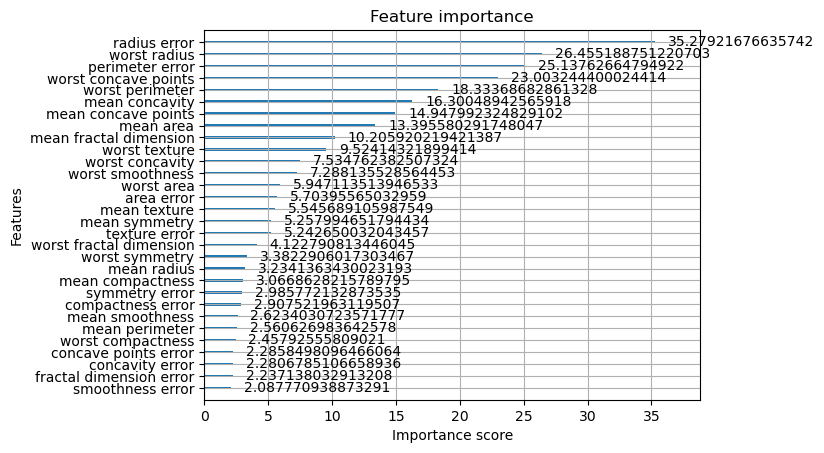

In [37]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

# cancer_df에서 feature용 DataFrame과 label용 Series 객체 추출 : 위 데이터프레임을 데이터와 레이블(target) 분리
# 맨 마지막 컬럼이 Label임
# Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1로 슬라이싱으로 추출
X_features=cancer_dr.iloc[:,:-1] # 데이터 추출
y_label=cancer_dr.iloc[:,-1] # 레이블 추출

# 전체 데이터 중 80% 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_label
    ,train_size=0.8
    ,random_state=156
)
# xgboost : 검증을 한다 => 조기 종료
# 검증하려면 데이터 필요
# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검즘용 데이터로 분리
X_tr,X_val,y_tr,y_val=train_test_split(
    X_train
    ,y_train
    ,test_size=0.1
    ,random_state=156
)

# 파이썬 기반 XGBoost 사용 : array 바로 사용 안됨 : 전용 데이터 타입을 사용
# array를 전용 데이터 타입으로 변환 함수 : Dmatrix()
# 학습, 검증, 테스트용 DMatrix를 생성
# 1. 학습데이터 변환
dtr=xgb.DMatrix(data=X_tr,label=y_tr)
# 2. 검증데이터 변환
dval=xgb.DMatrix(data=X_val,label=y_val)
# 3. 테스트데이터 변환
dtest=xgb.DMatrix(data=X_test,label=y_test)

# 파라미터 세팅
# 유방암 이진 분류
params = {
    'max_depth': 3,  # 트리의 최대 깊이 (값이 클수록 모델이 복잡해지며 과적합 위험 증가)
    'eta': 0.1,  # 학습률 (값이 작을수록 학습 속도가 느려지지만 일반화 성능이 향상될 가능성이 있음)
    'objective': 'binary:logistic',  # 이진 분류 문제를 위한 로지스틱 회귀 설정
    'eval_metric': 'logloss'  # 평가 지표로 로그 손실(log loss) 사용 (값이 작을수록 성능이 좋음)
}

num_rounds = 10000  # 부스팅 반복 횟수 (트리를 몇 개 생성할 것인지 결정)

# 학습 데이터와 검증 데이터 설정
# 학습 데이터 셋(dtr)은 'train', 평가 데이터 셋(dval)은 'eval'로 명기하여 학습 진행 상황을 모니터링
eval_list = [(dtr, 'train'), (dval, 'eval')]

# XGBoost 모델 학습
xgb_model = xgb.train(
    params=params,  # XGBoost 하이퍼파라미터 설정
    dtrain=dtr,  # 학습 데이터 셋
    num_boost_round=num_rounds,  # 부스팅 반복 횟수
    early_stopping_rounds=500,  # 50회 연속 개선이 없으면 학습 조기 종료 (과적합 방지)
    evals=eval_list  # 학습 과정에서 평가할 데이터 셋 목록 (학습 데이터와 검증 데이터)
)

pred_probs=xgb_model.predict(dtest)

# print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
# print(np.round(pred_probs[:10],3))
# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds=[1 if x >0.5 else 0 for x in pred_probs]
# print(f'예측값 10개만 표시 : {preds[:10]}')
# print(y_test[:10],end='')

# 유방암 여부 예측
# 오류에 민감한 모델 : 정확도만 보면 안된다
# 정밀도, 재현률, AUC
def get_clf_eval(y_test,pred=None,pred_probs=None):     # 원래답, 예측값(0,1), 예측 확률(0,1)
    from sklearn.metrics import confusion_matrix        # 혼돈행렬을 구하는 함수 (원래답, 예측값)
    from sklearn.metrics import accuracy_score          # 정확도 (원래답, 예측값)
    from sklearn.metrics import precision_score         # 정밀도 (원래답, 예측값)
    from sklearn.metrics import recall_score            # 재현률 (원래답, 예측값)
    from sklearn.metrics import f1_score                # 정밀도와 재현률의 조화 평균 (원래답, 예측값)
    from sklearn.metrics import roc_auc_score           # AUC 점수 : (원래답, 예측확률)
    confusion=confusion_matrix(
        y_test
        ,preds
    )
    acc=accuracy_score(
        y_test
        ,preds
    )
    precision=precision_score(
        y_test
        ,preds
    )
    recall_score_=recall_score(
        y_test
        ,preds
    )
    f1=f1_score(
        y_test
        ,preds
    )
    auc=roc_auc_score(
        y_test
        ,pred_probs
    )
    print(f'오차행렬\n{confusion}')
    
    # 평가지표 출력
    print(f'정확도 : {acc:.4f}, 정밀도 : {precision:.4f}, 재현률 : {recall_score_:.4f}, F1 : {f1:.4f}, AUC : {auc:.4f}')

# get_clf_eval(y_test,preds,pred_probs)

# 피쳐 중요도 : plot_importance()
import matplotlib.pyplot as plt

# importance_type : 중요도 추출하는 기준
#                   weight(기본값) : 특정 피쳐가 트리를 분기할 때 사용한 빈도수를 의미
#                                   얼마나 자주 트리 분할에 사용되었는지를 나타냄
#                                   다만, 많이 사용되었다고 해서 중요한 특성이 되는건 아님

#                   gain :  특성 트리를 분기할 때, 모델의 성능 개선에 얼마나 기여했는지를 평균
#                           gain 값이 클수록 많이 기여
#                           실제 특성의 중요도 평가 기능

#                   cover : 각 특성이 트리 분기에서 선택되었을 때, 분할에 의해 영향 받은 샘플들의 비율의 평균
#                           많이 사용하지 않는다

plot_importance(
    xgb_model
    ,importance_type='weight'
)
plot_importance(
    xgb_model
    ,importance_type='gain'
)
plot_importance(
    xgb_model
    ,importance_type='cover'
)
plt.show()

## 사이킷런 래퍼 XGBoost 개요 및 적용

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

X_features=cancer_dr.iloc[:,:-1] 
y_label=cancer_dr.iloc[:,-1] 

X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_label
    ,train_size=0.8
    ,random_state=156
)

X_tr,X_val,y_tr,y_val=train_test_split(
    X_train
    ,y_train
    ,test_size=0.1
    ,random_state=156
)

dtr=xgb.DMatrix(data=X_tr,label=y_tr)
dval=xgb.DMatrix(data=X_val,label=y_val)
dtest=xgb.DMatrix(data=X_test,label=y_test)

params = {
    'max_depth': 3,  # 트리의 최대 깊이 (값이 클수록 모델이 복잡해지며 과적합 위험 증가)
    'eta': 0.1,  # 학습률 (값이 작을수록 학습 속도가 느려지지만 일반화 성능이 향상될 가능성이 있음)
    'objective': 'binary:logistic',  # 이진 분류 문제를 위한 로지스틱 회귀 설정
    'eval_metric': 'logloss'  # 평가 지표로 로그 손실(log loss) 사용 (값이 작을수록 성능이 좋음)
}

num_rounds = 10000  

eval_list = [(dtr, 'train'), (dval, 'eval')]

xgb_model = xgb.train(
    params=params,  # XGBoost 하이퍼파라미터 설정
    dtrain=dtr,  # 학습 데이터 셋
    num_boost_round=num_rounds,  # 부스팅 반복 횟수
    early_stopping_rounds=500,  # 50회 연속 개선이 없으면 학습 조기 종료 (과적합 방지)
    evals=eval_list  # 학습 과정에서 평가할 데이터 셋 목록 (학습 데이터와 검증 데이터)
)

pred_probs=xgb_model.predict(dtest)

preds=[1 if x >0.5 else 0 for x in pred_probs]

def get_clf_eval(y_test,pred=None,pred_probs=None):     # 원래답, 예측값(0,1), 예측 확률(0,1)
    from sklearn.metrics import confusion_matrix        # 혼돈행렬을 구하는 함수 (원래답, 예측값)
    from sklearn.metrics import accuracy_score          # 정확도 (원래답, 예측값)
    from sklearn.metrics import precision_score         # 정밀도 (원래답, 예측값)
    from sklearn.metrics import recall_score            # 재현률 (원래답, 예측값)
    from sklearn.metrics import f1_score                # 정밀도와 재현률의 조화 평균 (원래답, 예측값)
    from sklearn.metrics import roc_auc_score           # AUC 점수 : (원래답, 예측확률)
    confusion=confusion_matrix(
        y_test
        ,preds
    )
    acc=accuracy_score(
        y_test
        ,preds
    )
    precision=precision_score(
        y_test
        ,preds
    )
    recall_score_=recall_score(
        y_test
        ,preds
    )
    f1=f1_score(
        y_test
        ,preds
    )
    auc=roc_auc_score(
        y_test
        ,pred_probs
    )
    print(f'오차행렬\n{confusion}')
    
    # 평가지표 출력
    print(f'정확도 : {acc:.4f}, 정밀도 : {precision:.4f}, 재현률 : {recall_score_:.4f}, F1 : {f1:.4f}, AUC : {auc:.4f}')


# 사이킷런 기반 XGboost 사용
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(
    n_estimators=1000
    ,learning_rate=0.1
    ,max_depth=3
    ,eval_metric='logloss'
)
xgb_wrapper.fit(X_train,y_train,verbose=True)
w_preds=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test,w_preds,w_pred_proba)

[0]	train-logloss:0.58448	eval-logloss:0.60406
[1]	train-logloss:0.51755	eval-logloss:0.55810
[2]	train-logloss:0.46160	eval-logloss:0.51829
[3]	train-logloss:0.41227	eval-logloss:0.48332
[4]	train-logloss:0.37097	eval-logloss:0.45158
[5]	train-logloss:0.33550	eval-logloss:0.42452
[6]	train-logloss:0.30431	eval-logloss:0.40638
[7]	train-logloss:0.27728	eval-logloss:0.38845
[8]	train-logloss:0.25301	eval-logloss:0.37252
[9]	train-logloss:0.23069	eval-logloss:0.35833
[10]	train-logloss:0.21102	eval-logloss:0.34634
[11]	train-logloss:0.19422	eval-logloss:0.33539
[12]	train-logloss:0.17862	eval-logloss:0.32481
[13]	train-logloss:0.16474	eval-logloss:0.31769
[14]	train-logloss:0.15249	eval-logloss:0.31101
[15]	train-logloss:0.14137	eval-logloss:0.30528
[16]	train-logloss:0.13131	eval-logloss:0.30112
[17]	train-logloss:0.12213	eval-logloss:0.29578
[18]	train-logloss:0.11410	eval-logloss:0.29160
[19]	train-logloss:0.10684	eval-logloss:0.28791
[20]	train-logloss:0.10022	eval-logloss:0.28446
[2

In [3]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

X_features=cancer_dr.iloc[:,:-1] 
y_label=cancer_dr.iloc[:,-1] 

X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_label
    ,train_size=0.8
    ,random_state=156
)

X_tr,X_val,y_tr,y_val=train_test_split(
    X_train
    ,y_train
    ,test_size=0.1
    ,random_state=156
)

dtr=xgb.DMatrix(data=X_tr,label=y_tr)
dval=xgb.DMatrix(data=X_val,label=y_val)
dtest=xgb.DMatrix(data=X_test,label=y_test)

params = {
    'max_depth': 3,  # 트리의 최대 깊이 (값이 클수록 모델이 복잡해지며 과적합 위험 증가)
    'eta': 0.1,  # 학습률 (값이 작을수록 학습 속도가 느려지지만 일반화 성능이 향상될 가능성이 있음)
    'objective': 'binary:logistic',  # 이진 분류 문제를 위한 로지스틱 회귀 설정
    'eval_metric': 'logloss'  # 평가 지표로 로그 손실(log loss) 사용 (값이 작을수록 성능이 좋음)
}

num_rounds = 10000  

eval_list = [(dtr, 'train'), (dval, 'eval')]

# xgb_model = xgb.train(
#     params=params,  # XGBoost 하이퍼파라미터 설정
#     dtrain=dtr,  # 학습 데이터 셋
#     num_boost_round=num_rounds,  # 부스팅 반복 횟수
#     early_stopping_rounds=500,  # 50회 연속 개선이 없으면 학습 조기 종료 (과적합 방지)
#     evals=eval_list  # 학습 과정에서 평가할 데이터 셋 목록 (학습 데이터와 검증 데이터)
# )

# pred_probs=xgb_model.predict(dtest)

# preds=[1 if x >0.5 else 0 for x in pred_probs]

def get_clf_eval(y_test,preds=None,pred_probs=None):     # 원래답, 예측값(0,1), 예측 확률(0,1)
    from sklearn.metrics import confusion_matrix        # 혼돈행렬을 구하는 함수 (원래답, 예측값)
    from sklearn.metrics import accuracy_score          # 정확도 (원래답, 예측값)
    from sklearn.metrics import precision_score         # 정밀도 (원래답, 예측값)
    from sklearn.metrics import recall_score            # 재현률 (원래답, 예측값)
    from sklearn.metrics import f1_score                # 정밀도와 재현률의 조화 평균 (원래답, 예측값)
    from sklearn.metrics import roc_auc_score           # AUC 점수 : (원래답, 예측확률)
    confusion=confusion_matrix(
        y_test
        ,preds
    )
    acc=accuracy_score(
        y_test
        ,preds
    )
    precision=precision_score(
        y_test
        ,preds
    )
    recall_score_=recall_score(
        y_test
        ,preds
    )
    f1=f1_score(
        y_test
        ,preds
    )
    auc=roc_auc_score(
        y_test
        ,pred_probs
    )
    print(f'오차행렬\n{confusion}')
    
    # 평가지표 출력
    print(f'정확도 : {acc:.4f}, 정밀도 : {precision:.4f}, 재현률 : {recall_score_:.4f}, F1 : {f1:.4f}, AUC : {auc:.4f}')


# 사이킷런 기반 XGboost 사용
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(
    n_estimators=1000
    ,learning_rate=0.1
    ,max_depth=3
)
xgb_wrapper.fit(X_train,y_train,verbose=True)
w_preds=xgb_wrapper.predict(X_test) # 예측값
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1] #이진분류 예측 확률
get_clf_eval(y_test,w_preds,w_pred_proba)


오차행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현률 : 0.9870, F1 : 0.9806, AUC : 0.9954


In [4]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

X_features=cancer_dr.iloc[:,:-1] 
y_label=cancer_dr.iloc[:,-1] 

X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_label
    ,train_size=0.8
    ,random_state=156
)

X_tr,X_val,y_tr,y_val=train_test_split(
    X_train
    ,y_train
    ,test_size=0.1
    ,random_state=156
)

dtr=xgb.DMatrix(data=X_tr,label=y_tr)
dval=xgb.DMatrix(data=X_val,label=y_val)
dtest=xgb.DMatrix(data=X_test,label=y_test)

params = {
    'max_depth': 3,  # 트리의 최대 깊이 (값이 클수록 모델이 복잡해지며 과적합 위험 증가)
    'eta': 0.1,  # 학습률 (값이 작을수록 학습 속도가 느려지지만 일반화 성능이 향상될 가능성이 있음)
    'objective': 'binary:logistic',  # 이진 분류 문제를 위한 로지스틱 회귀 설정
    'eval_metric': 'logloss'  # 평가 지표로 로그 손실(log loss) 사용 (값이 작을수록 성능이 좋음)
}

num_rounds = 10000  

eval_list = [(dtr, 'train'), (dval, 'eval')]

# xgb_model = xgb.train(
#     params=params,  # XGBoost 하이퍼파라미터 설정
#     dtrain=dtr,  # 학습 데이터 셋
#     num_boost_round=num_rounds,  # 부스팅 반복 횟수
#     early_stopping_rounds=500,  # 50회 연속 개선이 없으면 학습 조기 종료 (과적합 방지)
#     evals=eval_list  # 학습 과정에서 평가할 데이터 셋 목록 (학습 데이터와 검증 데이터)
# )

# pred_probs=xgb_model.predict(dtest)

# preds=[1 if x >0.5 else 0 for x in pred_probs]

def get_clf_eval(y_test,preds=None,pred_probs=None):     # 원래답, 예측값(0,1), 예측 확률(0,1)
    from sklearn.metrics import confusion_matrix        # 혼돈행렬을 구하는 함수 (원래답, 예측값)
    from sklearn.metrics import accuracy_score          # 정확도 (원래답, 예측값)
    from sklearn.metrics import precision_score         # 정밀도 (원래답, 예측값)
    from sklearn.metrics import recall_score            # 재현률 (원래답, 예측값)
    from sklearn.metrics import f1_score                # 정밀도와 재현률의 조화 평균 (원래답, 예측값)
    from sklearn.metrics import roc_auc_score           # AUC 점수 : (원래답, 예측확률)
    confusion=confusion_matrix(
        y_test
        ,preds
    )
    acc=accuracy_score(
        y_test
        ,preds
    )
    precision=precision_score(
        y_test
        ,preds
    )
    recall_score_=recall_score(
        y_test
        ,preds
    )
    f1=f1_score(
        y_test
        ,preds
    )
    auc=roc_auc_score(
        y_test
        ,pred_probs
    )
    print(f'오차행렬\n{confusion}')
    
    # 평가지표 출력
    print(f'정확도 : {acc:.4f}, 정밀도 : {precision:.4f}, 재현률 : {recall_score_:.4f}, F1 : {f1:.4f}, AUC : {auc:.4f}')


# 사이킷런 기반 XGboost 사용
from xgboost import XGBClassifier

# xgb_wrapper=XGBClassifier(
#     n_estimators=1000
#     ,learning_rate=0.1
#     ,max_depth=3
#     ,eval_metric='logloss'
# )
# xgb_wrapper.fit(X_train,y_train,verbose=True)
# w_preds=xgb_wrapper.predict(X_test) # 예측값
# w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1] #이진분류 예측 확률
# get_clf_eval(y_test,w_preds,w_pred_proba)

from xgboost import XGBClassifier
xgb_wrapper=XGBClassifier(
    n_estimators=1000
    ,early_stopping_rounds=100 # 100번 동안 오차가 개선이 안되면 멈춰라
    ,learning_rate=0.1
    ,max_depth=3
    ,eval_metric='logloss'
)

# 테스트데이터 설정
evals=[
    (X_test,y_test)
]
xgb_wrapper.fit(X_train,y_train,eval_set=evals,verbose=True)

[0]	validation_0-logloss:0.56499
[1]	validation_0-logloss:0.50615
[2]	validation_0-logloss:0.45818
[3]	validation_0-logloss:0.41774
[4]	validation_0-logloss:0.38060
[5]	validation_0-logloss:0.35098
[6]	validation_0-logloss:0.32552
[7]	validation_0-logloss:0.30095
[8]	validation_0-logloss:0.28167
[9]	validation_0-logloss:0.26239
[10]	validation_0-logloss:0.24797
[11]	validation_0-logloss:0.23210
[12]	validation_0-logloss:0.22060
[13]	validation_0-logloss:0.20778
[14]	validation_0-logloss:0.19775
[15]	validation_0-logloss:0.18975
[16]	validation_0-logloss:0.18064
[17]	validation_0-logloss:0.17250
[18]	validation_0-logloss:0.16517
[19]	validation_0-logloss:0.15833
[20]	validation_0-logloss:0.15442
[21]	validation_0-logloss:0.14640
[22]	validation_0-logloss:0.13943
[23]	validation_0-logloss:0.13421
[24]	validation_0-logloss:0.13041
[25]	validation_0-logloss:0.12705
[26]	validation_0-logloss:0.12288
[27]	validation_0-logloss:0.11970
[28]	validation_0-logloss:0.11748
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [13]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_dr=pd.DataFrame(
    data=X_features
    ,columns=dataset.feature_names
)
cancer_dr['target']=y_label

X_features=cancer_dr.iloc[:,:-1] 
y_label=cancer_dr.iloc[:,-1] 

X_train,X_test,y_train,y_test=train_test_split(
    X_features
    ,y_label
    ,train_size=0.8
    ,random_state=156
)

X_tr,X_val,y_tr,y_val=train_test_split(
    X_train
    ,y_train
    ,test_size=0.1
    ,random_state=156
)

dtr=xgb.DMatrix(data=X_tr,label=y_tr)
dval=xgb.DMatrix(data=X_val,label=y_val)
dtest=xgb.DMatrix(data=X_test,label=y_test)

params = {
    'max_depth': 3,  # 트리의 최대 깊이 (값이 클수록 모델이 복잡해지며 과적합 위험 증가)
    'eta': 0.1,  # 학습률 (값이 작을수록 학습 속도가 느려지지만 일반화 성능이 향상될 가능성이 있음)
    'objective': 'binary:logistic',  # 이진 분류 문제를 위한 로지스틱 회귀 설정
    'eval_metric': 'logloss'  # 평가 지표로 로그 손실(log loss) 사용 (값이 작을수록 성능이 좋음)
}

num_rounds = 10000  

eval_list = [(dtr, 'train'), (dval, 'eval')]

# xgb_model = xgb.train(
#     params=params,  # XGBoost 하이퍼파라미터 설정
#     dtrain=dtr,  # 학습 데이터 셋
#     num_boost_round=num_rounds,  # 부스팅 반복 횟수
#     early_stopping_rounds=500,  # 50회 연속 개선이 없으면 학습 조기 종료 (과적합 방지)
#     evals=eval_list  # 학습 과정에서 평가할 데이터 셋 목록 (학습 데이터와 검증 데이터)
# )

# pred_probs=xgb_model.predict(dtest)

# preds=[1 if x >0.5 else 0 for x in pred_probs]

def get_clf_eval(y_test,preds=None,pred_probs=None):     # 원래답, 예측값(0,1), 예측 확률(0,1)
    from sklearn.metrics import confusion_matrix        # 혼돈행렬을 구하는 함수 (원래답, 예측값)
    from sklearn.metrics import accuracy_score          # 정확도 (원래답, 예측값)
    from sklearn.metrics import precision_score         # 정밀도 (원래답, 예측값)
    from sklearn.metrics import recall_score            # 재현률 (원래답, 예측값)
    from sklearn.metrics import f1_score                # 정밀도와 재현률의 조화 평균 (원래답, 예측값)
    from sklearn.metrics import roc_auc_score           # AUC 점수 : (원래답, 예측확률)
    confusion=confusion_matrix(
        y_test
        ,preds
    )
    acc=accuracy_score(
        y_test
        ,preds
    )
    precision=precision_score(
        y_test
        ,preds
    )
    recall_score_=recall_score(
        y_test
        ,preds
    )
    f1=f1_score(
        y_test
        ,preds
    )
    auc=roc_auc_score(
        y_test
        ,pred_probs
    )
    print(f'오차행렬\n{confusion}')
    
    # 평가지표 출력
    print(f'정확도 : {acc:.4f}, 정밀도 : {precision:.4f}, 재현률 : {recall_score_:.4f}, F1 : {f1:.4f}, AUC : {auc:.4f}')


# 사이킷런 기반 XGboost 사용
from xgboost import XGBClassifier

# xgb_wrapper=XGBClassifier(
#     n_estimators=1000
#     ,learning_rate=0.1
#     ,max_depth=3
#     ,eval_metric='logloss'
# )
# xgb_wrapper.fit(X_train,y_train,verbose=True)
# w_preds=xgb_wrapper.predict(X_test) # 예측값
# w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1] #이진분류 예측 확률
# get_clf_eval(y_test,w_preds,w_pred_proba)

from xgboost import XGBClassifier
xgb_wrapper=XGBClassifier(
    n_estimators=1000
    ,early_stopping_rounds=100 # 100번 동안 오차가 개선이 안되면 멈춰라
    ,learning_rate=0.1
    ,max_depth=3
    ,eval_metric='logloss'
)

# 테스트데이터 설정
evals=[
    (X_test,y_test)
]
xgb_wrapper.fit(X_train,y_train,eval_set=evals,verbose=True)

# 예측값 추출
ws_preds=xgb_wrapper.predict(X_test)

# 예측 확률 추출
ws_prd_proba=xgb_wrapper.predict_proba(X_test)[:,-1]

# 일반화 성능 출력
get_clf_eval(y_test,ws_preds,ws_prd_proba)

[0]	validation_0-logloss:0.56499
[1]	validation_0-logloss:0.50615
[2]	validation_0-logloss:0.45818
[3]	validation_0-logloss:0.41774
[4]	validation_0-logloss:0.38060
[5]	validation_0-logloss:0.35098
[6]	validation_0-logloss:0.32552
[7]	validation_0-logloss:0.30095
[8]	validation_0-logloss:0.28167
[9]	validation_0-logloss:0.26239
[10]	validation_0-logloss:0.24797
[11]	validation_0-logloss:0.23210
[12]	validation_0-logloss:0.22060
[13]	validation_0-logloss:0.20778
[14]	validation_0-logloss:0.19775
[15]	validation_0-logloss:0.18975
[16]	validation_0-logloss:0.18064
[17]	validation_0-logloss:0.17250
[18]	validation_0-logloss:0.16517
[19]	validation_0-logloss:0.15833
[20]	validation_0-logloss:0.15442
[21]	validation_0-logloss:0.14640
[22]	validation_0-logloss:0.13943
[23]	validation_0-logloss:0.13421
[24]	validation_0-logloss:0.13041
[25]	validation_0-logloss:0.12705
[26]	validation_0-logloss:0.12288
[27]	validation_0-logloss:0.11970
[28]	validation_0-logloss:0.11748
[29]	validation_0-loglos